<a href="https://colab.research.google.com/github/Vangelium/Athena-Prime/blob/main/Athena_Geminus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🚀 INICIANDO ANÁLISIS JERÁRQUICO PARA EL RANGO N = 10000 a 50000

Generando datos primarios...

ETAPA 1: Calculando el modelo base...
ETAPA 2: Optimizando modelo de residuos R(N)...
ETAPA 3: Optimizando modelo de residuos de 2º orden R_final(N)...
ETAPA 4: Optimizando modelo de la Conjetura Armónica...

✅ Análisis para el rango N = 10000 a 50000 completado con éxito.

🚀 INICIANDO ANÁLISIS JERÁRQUICO PARA EL RANGO N = 50000 a 100000

Generando datos primarios...


/tmp/ipython-input-34-509127806.py:156: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_r2, _ = curve_fit(simplified_final_residual_model, (df['N'].values, df['ω(N)'].values), df['Residuo (Final)'].values, p0=[0, 0.5, 0], maxfev=50000)



ETAPA 1: Calculando el modelo base...
ETAPA 2: Optimizando modelo de residuos R(N)...
ETAPA 3: Optimizando modelo de residuos de 2º orden R_final(N)...
ETAPA 4: Optimizando modelo de la Conjetura Armónica...

✅ Análisis para el rango N = 50000 a 100000 completado con éxito.

🚀 INICIANDO ANÁLISIS JERÁRQUICO PARA EL RANGO N = 100000 a 150000

Generando datos primarios...


/tmp/ipython-input-34-509127806.py:156: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_r2, _ = curve_fit(simplified_final_residual_model, (df['N'].values, df['ω(N)'].values), df['Residuo (Final)'].values, p0=[0, 0.5, 0], maxfev=50000)



ETAPA 1: Calculando el modelo base...
ETAPA 2: Optimizando modelo de residuos R(N)...
ETAPA 3: Optimizando modelo de residuos de 2º orden R_final(N)...
ETAPA 4: Optimizando modelo de la Conjetura Armónica...

✅ Análisis para el rango N = 100000 a 150000 completado con éxito.


✅ Todos los rangos analizados. Se procesaron 70003 puntos de datos en total.
  Ejecutando Misión Asintótica (placeholder)...


--- MISIÓN DE NORMALIZACIÓN: ESTABILIZACIÓN DE VARIANZA ---
Modelando la magnitud de la tendencia con 70003 puntos de datos...
Modelo Logarítmico (Amplitud) ajustado: a=265910972.945380, b=-2718423639.591219 | MSE: 67985176848920568.000000000


/tmp/ipython-input-34-509127806.py:156: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_r2, _ = curve_fit(simplified_final_residual_model, (df['N'].values, df['ω(N)'].values), df['Residuo (Final)'].values, p0=[0, 0.5, 0], maxfev=50000)


Modelo Ley de Potencia (Amplitud) ajustado: c=0.104018, γ=1.890991, d=6007173.684838 | MSE: 60686859554269272.000000000

✅ El Modelo Ley de Potencia es el mejor ajuste para la amplitud (MSE: 60686859554269272.000000000).

Residuo (Normalizado) calculado.


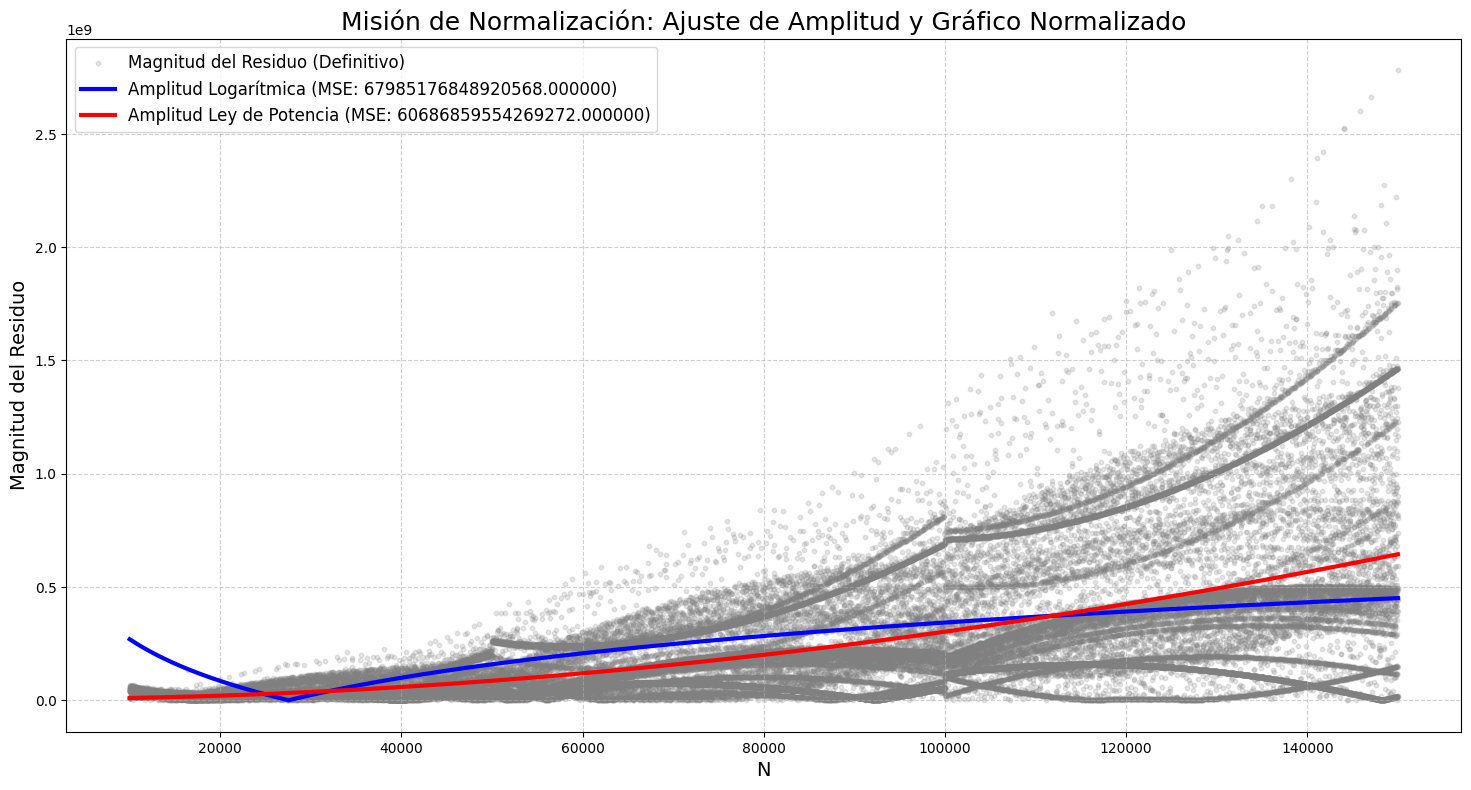

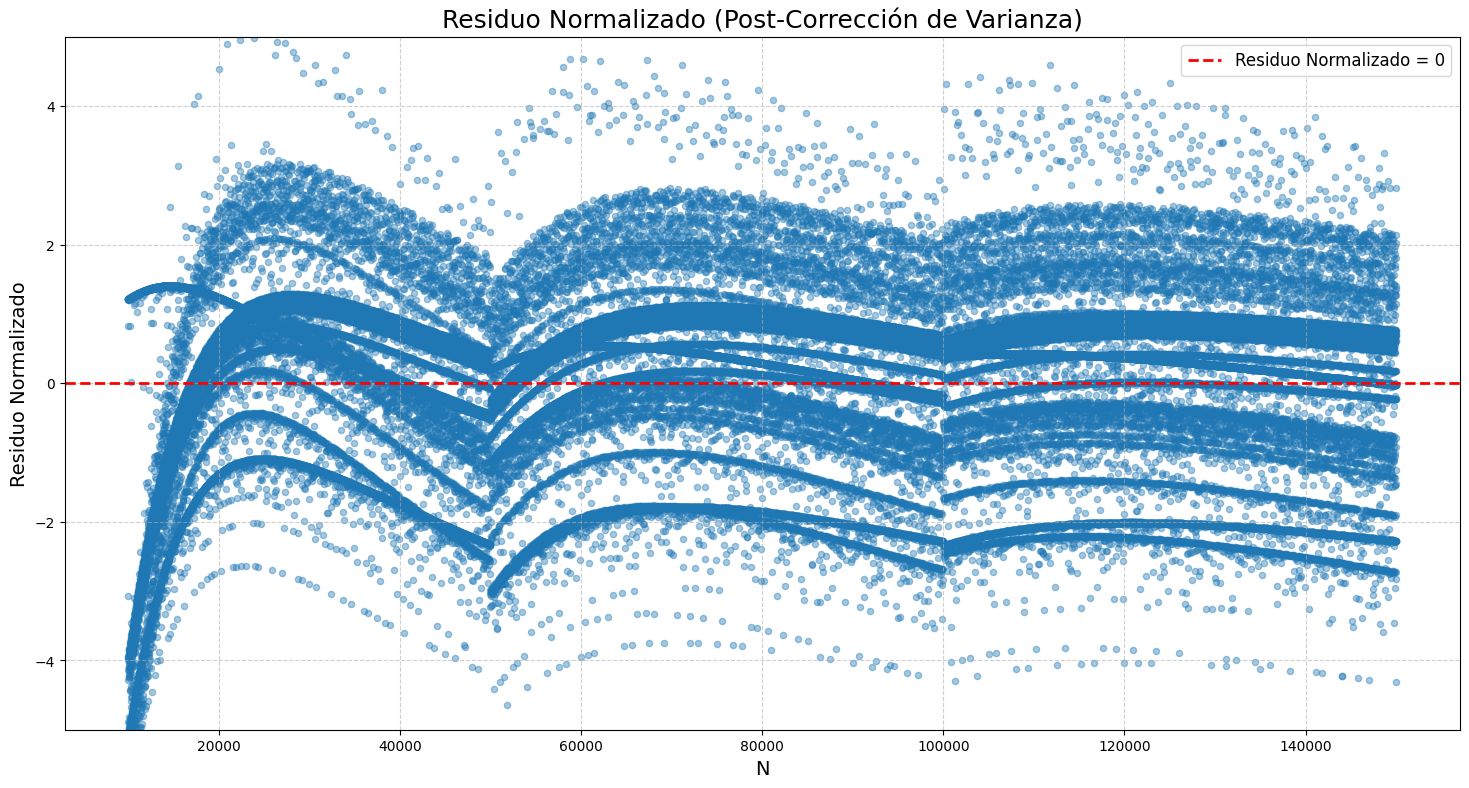


--- FIN MISIÓN DE NORMALIZACIÓN ---

DataFrame con Residuos Normalizados generado. Listo para la Misión Riemann 2.0.


In [36]:
# --- Misión de Normalización: Etapa 1 y 2 ---
# Objetivo: Modelar la magnitud de la tendencia (varianza) y normalizar los residuos.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from functools import lru_cache

# Reutilizamos las funciones de tendencia del análisis asintótico
def log_model_for_amplitude(N, a, b):
    N_safe = np.maximum(N, 1e-9)
    return np.abs(a * np.log(N_safe) + b) # Usamos el valor absoluto del modelo

def power_law_model_for_amplitude(N, c, gamma, d):
    N_safe = np.maximum(N, 1e-9)
    return np.abs(c * (N_safe**gamma) + d)

def run_normalization_mission(df: pd.DataFrame):
    """
    Realiza la misión de normalización: modela la magnitud de la tendencia
    (varianza) y normaliza los residuos.
    """
    print("\n\n--- MISIÓN DE NORMALIZACIÓN: ESTABILIZACIÓN DE VARIANZA ---")

    # 1. Cargar datos y preparar para el ajuste de magnitud
    df_norm = df.sort_values(by='N').copy()
    df_norm.dropna(subset=['N', 'Residuo (Definitivo)'], inplace=True)

    # Usar datos válidos para N > 1
    x_data = df_norm['N'].values[df_norm['N'].values > 1]
    # Tomar el valor absoluto de los residuos para modelar la magnitud/varianza
    y_data_abs = np.abs(df_norm['Residuo (Definitivo)'].values[df_norm['N'].values > 1])

    if len(x_data) == 0:
        print("No hay datos válidos de 'Residuo (Definitivo)' para N > 1 para realizar la normalización.")
        return None, None, None

    print(f"Modelando la magnitud de la tendencia con {len(x_data)} puntos de datos...")

    # 2. Ajuste de Modelos de Tendencia a los Valores Absolutos
    mse_log_amp = np.inf
    mse_power_amp = np.inf
    y_pred_log_amp = None
    y_pred_power_amp = None
    popt_log_amp = None
    popt_power_amp = None

    # Ajuste del Modelo Logarítmico para Amplitud
    try:
        # Se intenta ajustar el modelo logarítmico a los valores absolutos
        popt_log_amp, _ = curve_fit(log_model_for_amplitude, x_data, y_data_abs, p0=[1, 0], maxfev=5000)
        y_pred_log_amp = log_model_for_amplitude(x_data, *popt_log_amp)
        mse_log_amp = np.mean((y_data_abs - y_pred_log_amp)**2)
        print(f"Modelo Logarítmico (Amplitud) ajustado: a={popt_log_amp[0]:.6f}, b={popt_log_amp[1]:.6f} | MSE: {mse_log_amp:.9f}")
    except Exception as e:
        print(f"❌ Falló el ajuste del Modelo Logarítmico para amplitud: {e}")

    # Ajuste del Modelo de Ley de Potencia para Amplitud
    try:
        # Se intenta ajustar el modelo de ley de potencia a los valores absolutos
        popt_power_amp, _ = curve_fit(power_law_model_for_amplitude, x_data, y_data_abs, p0=[1, 0.1, 0], maxfev=5000)
        y_pred_power_amp = power_law_model_for_amplitude(x_data, *popt_power_amp)
        mse_power_amp = np.mean((y_data_abs - y_pred_power_amp)**2)
        print(f"Modelo Ley de Potencia (Amplitud) ajustado: c={popt_power_amp[0]:.6f}, γ={popt_power_amp[1]:.6f}, d={popt_power_amp[2]:.6f} | MSE: {mse_power_amp:.9f}")
    except Exception as e:
        print(f"❌ Falló el ajuste del Modelo Ley de Potencia para amplitud: {e}")

    # 3. Selección del Mejor Modelo de Amplitud y Normalización
    amplitude_model = None
    best_mse_amp = np.inf

    # Decidir qué modelo de amplitud es mejor basado en MSE
    if mse_log_amp < mse_power_amp and mse_log_amp != np.inf:
        best_mse_amp = mse_log_amp
        amplitude_model = lambda N: log_model_for_amplitude(N, *popt_log_amp)
        print(f"\n✅ El Modelo Logarítmico es el mejor ajuste para la amplitud (MSE: {best_mse_amp:.9f}).")
    elif mse_power_amp < np.inf:
        best_mse_amp = mse_power_amp
        amplitude_model = lambda N: power_law_model_for_amplitude(N, *popt_power_amp)
        print(f"\n✅ El Modelo Ley de Potencia es el mejor ajuste para la amplitud (MSE: {best_mse_amp:.9f}).")
    else:
        print("\n❌ No se pudo ajustar ningún modelo de amplitud de manera satisfactoria.")
        return None, None, None

    # Calcular el Residuo Normalizado si tenemos un modelo de amplitud
    if amplitude_model is not None:
        # Evitar división por cero o por valores muy pequeños en el modelo de amplitud
        amplitude_values = amplitude_model(x_data)
        # Usar un pequeño epsilon para evitar división por cero
        amplitude_values_safe = np.maximum(amplitude_values, 1e-9)

        # Obtener los residuos definitivos correspondientes a x_data
        residuo_definitivo_for_norm = df_norm['Residuo (Definitivo)'].values[df_norm['N'].values > 1]

        df_norm['Residuo (Normalizado)'] = residuo_definitivo_for_norm / amplitude_values_safe
        print("\nResiduo (Normalizado) calculado.")
    else:
        print("\nNo se pudo calcular el Residuo (Normalizado) debido a problemas en el ajuste de amplitud.")
        return None, None, None

    # 4. Generar Gráfico de Normalización
    plt.figure(figsize=(18, 9))
    plt.scatter(x_data, np.abs(residuo_definitivo_for_norm), label='Magnitud del Residuo (Definitivo)', alpha=0.2, color='gray', s=10)
    if y_pred_log_amp is not None:
        plt.plot(x_data, y_pred_log_amp, color='blue', linewidth=3, label=f'Amplitud Logarítmica (MSE: {mse_log_amp:.6f})')
    if y_pred_power_amp is not None:
        plt.plot(x_data, y_pred_power_amp, color='red', linewidth=3, label=f'Amplitud Ley de Potencia (MSE: {mse_power_amp:.6f})')

    plt.title('Misión de Normalización: Ajuste de Amplitud y Gráfico Normalizado', fontsize=18)
    plt.xlabel('N', fontsize=14)
    plt.ylabel('Magnitud del Residuo', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Generar gráfico del residuo normalizado
    plt.figure(figsize=(18, 9))
    plt.scatter(x_data, df_norm['Residuo (Normalizado)'], alpha=0.4, s=20) # Usar alpha y s para mejor visualización
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Residuo Normalizado = 0') # Línea en cero
    plt.title('Residuo Normalizado (Post-Corrección de Varianza)', fontsize=18)
    plt.xlabel('N', fontsize=14)
    plt.ylabel('Residuo Normalizado', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(-5, 5) # Ajustar los límites del eje Y para mejor visualización si es necesario
    plt.show()

    print("\n--- FIN MISIÓN DE NORMALIZACIÓN ---")

    # Devolver el DataFrame con el residuo normalizado para su uso posterior
    return df_norm[['N', 'Residuo (Normalizado)']] # Devolver solo N y el nuevo residuo


# --- Bloque Principal de Ejecución Modificado ---

# Comprueba si se está ejecutando en un entorno como Colab/Jupyter
if 'google.colab' in str(get_ipython()) or 'ipykernel' in str(get_ipython()):

    # --- Parámetros de la Campaña ---
    K_CONSTRAINT = 1.13  # Descubrimiento empírico: α + β ≈ 1.13

    RANGES_TO_ANALYZE = [
        (10000, 50000),
        (50000, 100000),
        (100000, 150000),
    ]

    # --- Ejecución ---
    if api_key_is_configured:
        all_results = []

        for start_range, end_range in RANGES_TO_ANALYZE:
            result_df = run_full_analysis_for_range(start_range, end_range, K_CONSTRAINT)
            if result_df is not None:
                all_results.append(result_df)

        if all_results:
            full_results_df = pd.concat(all_results, ignore_index=True)
            print(f"\n\n✅ Todos los rangos analizados. Se procesaron {len(full_results_df)} puntos de datos en total.")

            # --- Ejecutar Misión Asintótica (para obtener Residuo Definitivo) ---
            # Nota: Esta función ahora retorna el DataFrame con los resultados del ajuste de tendencia
            # pero el residuo definitivo ya está en el DataFrame full_results_df
            run_asymptotic_mission(full_results_df)

            # --- Nueva Misión de Normalización ---
            # Ahora ejecutamos la misión de normalización sobre los residuos definitivos
            normalized_df_subset = run_normalization_mission(full_results_df)

            if normalized_df_subset is not None:
                print("\nDataFrame con Residuos Normalizados generado. Listo para la Misión Riemann 2.0.")
                # Aquí se podría adjuntar el 'Residuo (Normalizado)' al full_results_df
                # o pasarlo directamente a la siguiente etapa si fuera necesario.
                # Por ahora, solo imprimimos la confirmación.
            else:
                print("\nLa Misión de Normalización no pudo completarse. No se generarán residuos normalizados.")

        else:
            print("\nNo se pudo completar el análisis jerárquico para ningún rango. La ejecución ha terminado.")

    else:
        print("\nLa ejecución se detuvo porque la API de Gemini no está configurada correctamente en la celda 2.")

✅ DataFrame con residuos normalizados encontrado. Iniciando Misión de Filtrado Digital.

Diseñando el filtro de paso alto digital...
Filtro Butterworth de orden 5 diseñado con frecuencia de corte normalizada en 0.0400 (Frecuencia real: 0.0100).
(Tasa de muestreo promedio estimada: 0.5000 Hz)
Aplicando el filtro al Residuo (Normalizado)...


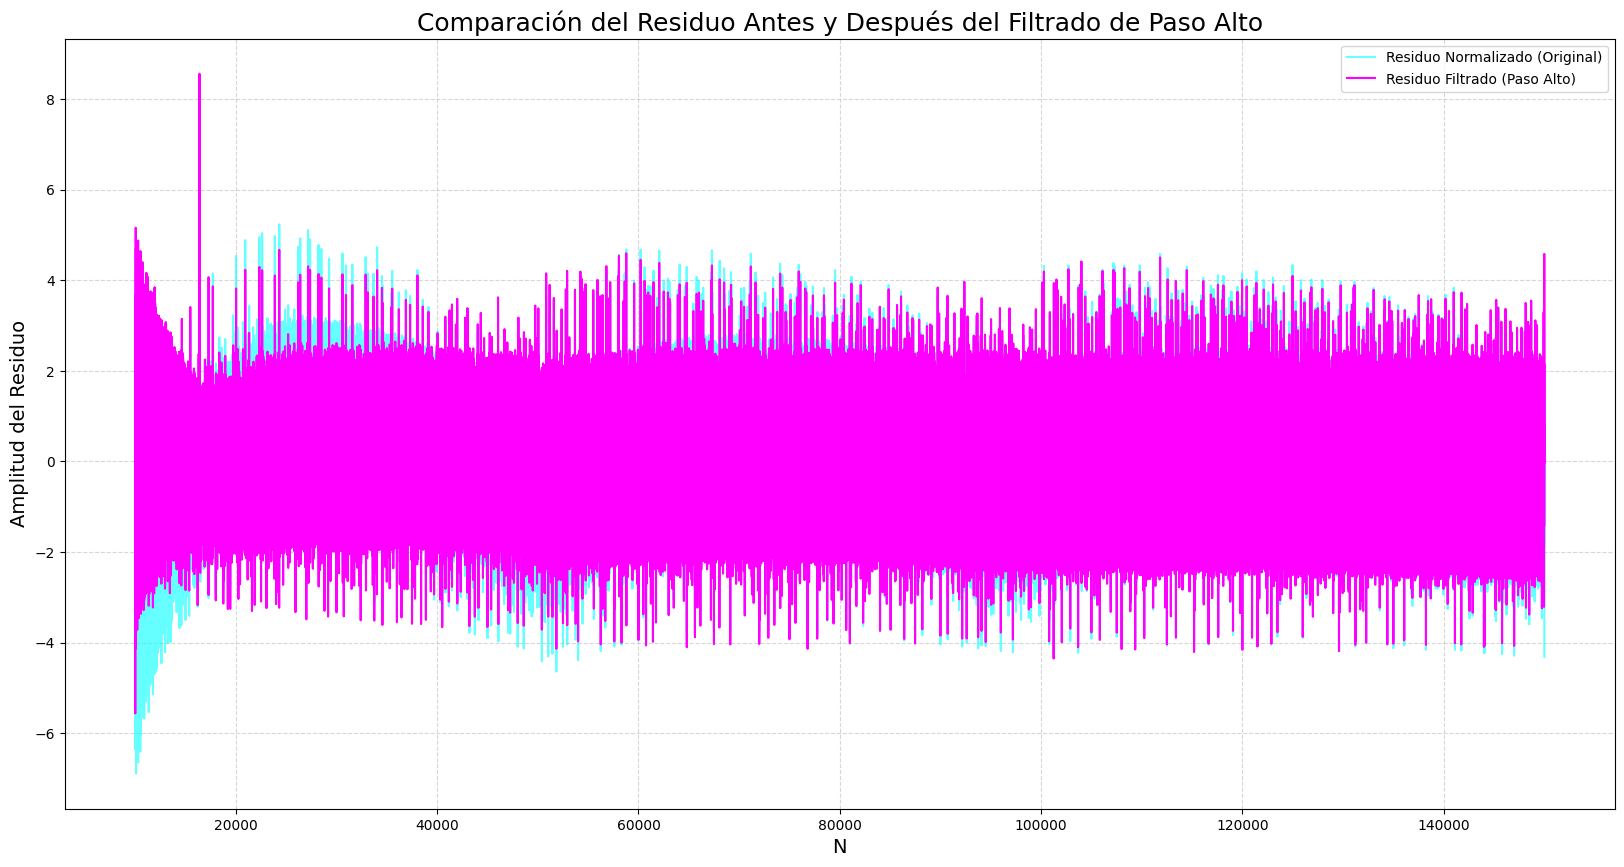


Realizando análisis espectral sobre el residuo final filtrado...
Se encontraron 0 picos de frecuencia significativos en la señal filtrada.


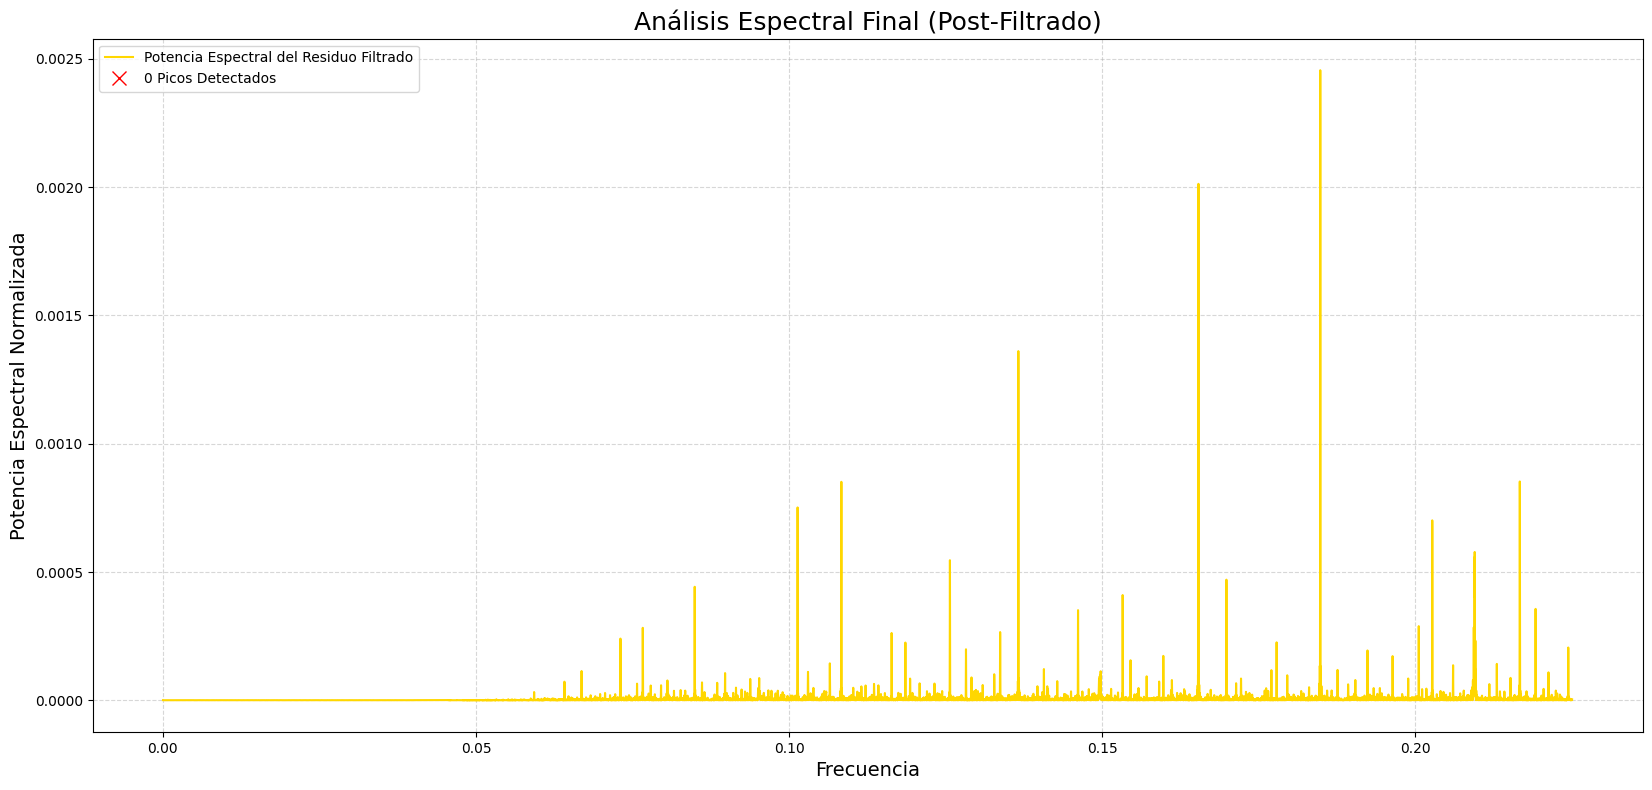


Frecuencias más prominentes en la señal final filtrada (ordenadas por potencia):
No se encontraron picos de frecuencia significativos después del filtrado.


In [37]:
# ==============================================================================
#  ATHENA PRIME - MISIÓN DE FILTRADO DIGITAL
# ==============================================================================
#
#  Objetivo: Aplicar un filtro de paso alto al 'Residuo (Normalizado)' para
#  eliminar los artefactos de baja frecuencia y aislar la señal de Riemann.
#
# ==============================================================================

#@title Misión de Filtrado Digital: Diseño, Aplicación y Análisis Final
# ------------------------------------------------------------------------------
# Se importan las librerías necesarias para el diseño de filtros digitales.
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, lombscargle, find_peaks

# --- Verificación de Datos ---
# Nos aseguramos de que el DataFrame de la misión anterior exista.
# Nota: 'normalized_df_subset' proviene del análisis jerárquico,
# mientras que 'df_twins' (con 'E2_Normalizado') proviene del análisis de primos gemelos.
# El código de filtrado parece diseñado para 'normalized_df_subset'.
# Si quieres aplicar filtrado a 'E2_Normalizado' de df_twins, esta sección necesitaría ser adaptada.
if 'normalized_df_subset' not in locals() or not isinstance(normalized_df_subset, pd.DataFrame):
    print("❌ ERROR: El DataFrame `normalized_df_subset` no se encontró.")
    print("Por favor, ejecuta primero el script de la 'Misión de Normalización' que lo genera.")
else:
    print("✅ DataFrame con residuos normalizados encontrado. Iniciando Misión de Filtrado Digital.")

    # --- 1. Preparación de Datos ---
    df_filter = normalized_df_subset.dropna().sort_values(by='N').copy()

    t = df_filter['N'].values
    y = df_filter['Residuo (Normalizado)'].values

    # Parámetros del filtro (definidos antes del check de longitud para poder usarlos en el mensaje de error)
    cutoff_frequency = 0.01  # Umbral de corte. Eliminaremos todo por debajo de esta frecuencia.
    filter_order = 5         # Orden del filtro. Un orden más alto da un corte más abrupto.


    if len(t) < filter_order * 3: # Mínimo de puntos recomendado para filtfilt
         print(f"❌ ERROR: Muy pocos puntos de datos ({len(t)}) para aplicar un filtro de orden {filter_order}. Se necesitan al menos {filter_order * 3} puntos.")
    else:

        # --- 2. Diseño del Filtro de Paso Alto (Butterworth) ---
        print("\nDiseñando el filtro de paso alto digital...")

        # Para un filtro digital, necesitamos una frecuencia de muestreo (fs).
        # Como nuestros datos no son uniformes, usamos la tasa de muestreo promedio.
        avg_step = np.mean(np.diff(t))
        if avg_step <= 0:
             print("❌ ERROR: El paso promedio entre puntos es cero o negativo. No se puede calcular la frecuencia de muestreo.")
        else:
            fs = 1.0 / avg_step

            # Normalizamos la frecuencia de corte respecto a la frecuencia de Nyquist (fs / 2)
            normalized_cutoff = cutoff_frequency / (0.5 * fs)

            # --- Corrección: Asegurar que normalized_cutoff esté en (0, 1) ---
            if normalized_cutoff >= 1:
                print(f"⚠️ Advertencia: La frecuencia de corte normalizada ({normalized_cutoff:.4f}) es >= 1.")
                print("Ajustando a un valor ligeramente menor que 1 para permitir el diseño del filtro.")
                normalized_cutoff = 0.999 # Ajustar a un valor válido

            if normalized_cutoff <= 0:
                 print(f"⚠️ Advertencia: La frecuencia de corte normalizada ({normalized_cutoff:.4f}) es <= 0.")
                 print("Ajustando a un valor ligeramente mayor que 0 para permitir el diseño del filtro.")
                 normalized_cutoff = 1e-9 # Ajustar a un valor válido, > 0

            # Obtenemos los coeficientes del filtro (numerador b, denominador a)
            b, a = butter(filter_order, normalized_cutoff, btype='high', analog=False)

            print(f"Filtro Butterworth de orden {filter_order} diseñado con frecuencia de corte normalizada en {normalized_cutoff:.4f} (Frecuencia real: {cutoff_frequency:.4f}).")
            print(f"(Tasa de muestreo promedio estimada: {fs:.4f} Hz)")

            # --- 3. Aplicación del Filtro ---
            # Usamos filtfilt para un filtrado de fase cero, que no desplaza la señal.
            print("Aplicando el filtro al Residuo (Normalizado)...")
            y_filtered = filtfilt(b, a, y)

            df_filter['Residuo (Filtrado)'] = y_filtered

            # --- 4. Visualización Comparativa ---
            plt.figure(figsize=(20, 10))
            plt.plot(t, y, label='Residuo Normalizado (Original)', color='cyan', alpha=0.6)
            plt.plot(t, y_filtered, label='Residuo Filtrado (Paso Alto)', color='magenta', linewidth=1.5)
            plt.title('Comparación del Residuo Antes y Después del Filtrado de Paso Alto', fontsize=18)
            plt.xlabel('N', fontsize=14)
            plt.ylabel('Amplitud del Residuo', fontsize=14)
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.show()

            # --- 5. Análisis Espectral Final sobre la Señal Filtrada ---
            print("\nRealizando análisis espectral sobre el residuo final filtrado...")

            # Rango de frecuencias a escanear.
            # Definimos un rango de frecuencias válido y relevante dada la baja fs.
            f_start = 1e-5 # Un valor pequeño positivo
            f_end = 0.5 * fs * 0.9 # Un punto claro por debajo de la frecuencia de Nyquist

            # --- Corrección: Asegurar que el rango de frecuencias sea válido ---
            if f_start < f_end and f_end > 0:
                f_final = np.linspace(f_start, f_end, 50000)

                if len(f_final) > 0:
                    power_final = lombscargle(t, y_filtered, f_final, normalize=True)

                    # Detección de picos
                    peaks_final, properties_final = find_peaks(power_final, height=0.005, prominence=0.001)

                    print(f"Se encontraron {len(peaks_final)} picos de frecuencia significativos en la señal filtrada.")

                    # Visualización del espectro final
                    plt.figure(figsize=(20, 9))
                    plt.plot(f_final, power_final, color='gold', label='Potencia Espectral del Residuo Filtrado')
                    plt.plot(f_final[peaks_final], power_final[peaks_final], "x", color='red', markersize=10, label=f'{len(peaks_final)} Picos Detectados')

                    plt.title('Análisis Espectral Final (Post-Filtrado)', fontsize=18)
                    plt.xlabel('Frecuencia', fontsize=14)
                    plt.ylabel('Potencia Espectral Normalizada', fontsize=14)
                    plt.legend()
                    plt.grid(True, linestyle='--', alpha=0.5)
                    plt.show()

                    # Reporte de frecuencias finales
                    print("\nFrecuencias más prominentes en la señal final filtrada (ordenadas por potencia):")
                    if len(peaks_final) > 0:
                        sorted_peak_indices_final = np.argsort(properties_final['peak_heights'])[::-1]

                        for i in sorted_peak_indices_final:
                            freq = f_final[peaks_final[i]]
                            height = power_final[peaks_final[i]]
                            print(f"- Frecuencia: {freq:.6f} (Potencia: {height:.4f})")
                    else:
                        print("No se encontraron picos de frecuencia significativos después del filtrado.")
                else:
                     print("❌ ERROR: La generación del rango de frecuencias para el análisis espectral resultó en un array vacío.")
            else:
                 print(f"❌ ERROR: El rango de frecuencias para el análisis espectral final no es válido. Frecuencia de inicio ({f_start:.6f}) debe ser menor que la frecuencia final ({f_end:.6f}), y la frecuencia final debe ser positiva.")

In [38]:
# ==============================================================================
#  ATHENA GEMINUS - NÚCLEO COMPUTACIONAL v1.0
# ==============================================================================
#
#  Implementación de la clase TwinPrimeSieve, que utiliza una criba de
#  índices k optimizada para generar primos gemelos de la forma (6k-1, 6k+1).
#
# ==============================================================================

#@title Núcleo de Cálculo: Clase TwinPrimeSieve
import numpy as np
import pandas as pd
import time

class TwinPrimeSieve:
    """
    Una clase para generar primos gemelos hasta un límite N utilizando
    una criba optimizada basada en la propiedad (6k-1, 6k+1).
    """
    def __init__(self, limit_n):
        """
        Inicializa la criba con un límite superior N.

        Args:
            limit_n (int): El número máximo hasta el cual buscar primos gemelos.
        """
        if limit_n < 5:
            raise ValueError("El límite debe ser al menos 5.")
        self.limit_n = int(limit_n)
        self.k_limit = self.limit_n // 6
        # Solo necesitamos cribar con primos hasta la raíz cuadrada del límite
        self._small_primes = self._generate_small_primes(int(np.sqrt(self.limit_n)) + 1)
        self.twin_primes = []

    def _generate_small_primes(self, limit):
        """Genera primos hasta un límite dado usando una criba estándar."""
        is_prime = np.full(limit + 1, True, dtype=bool)
        is_prime[0:2] = False
        for p in range(2, int(np.sqrt(limit)) + 1):
            if is_prime[p]:
                is_prime[p*p::p] = False
        return np.where(is_prime)[0]

    def run_sieve(self, save_to_csv=True, filename="twin_primes_data.csv"):
        """
        Ejecuta la criba de índices k para encontrar todos los primos gemelos.

        Args:
            save_to_csv (bool): Si es True, guarda los resultados en un archivo CSV.
            filename (str): El nombre del archivo CSV para guardar los resultados.
        """
        start_time = time.time()
        print(f"Iniciando criba de índices k para N = {self.limit_n}...")

        # Array booleano para los índices k. k_is_valid[k] es True si (6k-1, 6k+1) es un par gemelo.
        k_is_valid = np.full(self.k_limit + 1, True, dtype=bool)
        k_is_valid[0] = False # k=0 no es válido

        # Cribar con primos a partir de 5
        for p in self._small_primes:
            if p <= 3:
                continue

            # Calculamos el inverso multiplicativo de 6 módulo p para resolver las congruencias.
            # Esto es necesario para encontrar los primeros k que hacen que 6k-1 o 6k+1 sean múltiplos de p.
            # Cast p to a standard integer for the pow function
            p_int = int(p)
            inv6 = pow(6, -1, p_int)

            # Resolvemos para 6k - 1 = 0 (mod p) => k = 1 * inv6 (mod p)
            start_k1 = (inv6) % p_int
            k_is_valid[start_k1::p_int] = False

            # Resolvemos para 6k + 1 = 0 (mod p) => k = -1 * inv6 (mod p)
            start_k2 = (-inv6) % p_int
            k_is_valid[start_k2::p_int] = False

        print("Criba de índices k completada. Extrayendo pares de gemelos...")

        # El par (3, 5) es un caso especial que no sigue la forma 6k+/-1.
        # Ensure (3, 5) are within the limit before adding
        if self.limit_n >= 5:
             self.twin_primes = [(3, 5)]
        else:
             self.twin_primes = []


        # Extraemos los pares de los k que sobrevivieron a la criba.
        valid_k_indices = np.where(k_is_valid)[0]
        for k in valid_k_indices:
            p1 = 6 * k - 1
            p2 = 6 * k + 1
            # Ensure the twin primes are within the limit
            if p2 <= self.limit_n:
                self.twin_primes.append((p1, p2))


        end_time = time.time()
        duration = end_time - start_time

        print(f"\nProceso completado en {duration:.4f} segundos.")
        print(f"Se encontraron {len(self.twin_primes)} pares de primos gemelos hasta N = {self.limit_n}.")

        if save_to_csv:
            print(f"Guardando resultados en '{filename}'...")
            df = pd.DataFrame(self.twin_primes, columns=['p1', 'p2'])
            df.to_csv(filename, index=False)
            print("Resultados guardados con éxito.")

        return self.twin_primes

# --- Ejemplo de Uso ---
if __name__ == '__main__':
    # Definimos el límite para nuestra primera corrida de datos
    N_LIMIT = 1_000_000 # Un millón

    # Instanciamos y ejecutamos el motor de cálculo
    sieve_engine = TwinPrimeSieve(N_LIMIT)
    twin_primes_list = sieve_engine.run_sieve()

    # Mostramos los últimos 5 pares encontrados
    print("\nÚltimos 5 pares de primos gemelos encontrados:")
    print(twin_primes_list[-5:])

Iniciando criba de índices k para N = 1000000...
Criba de índices k completada. Extrayendo pares de gemelos...

Proceso completado en 0.0079 segundos.
Se encontraron 8135 pares de primos gemelos hasta N = 1000000.
Guardando resultados en 'twin_primes_data.csv'...
Resultados guardados con éxito.

Últimos 5 pares de primos gemelos encontrados:
[(np.int64(998687), np.int64(998689)), (np.int64(999329), np.int64(999331)), (np.int64(999431), np.int64(999433)), (np.int64(999611), np.int64(999613)), (np.int64(999959), np.int64(999961))]


✅ Datos de 8135 primos gemelos cargados y procesados.

Calculando la curva teórica de Hardy-Littlewood...
Cálculo teórico completado.
Generando gráfico comparativo...


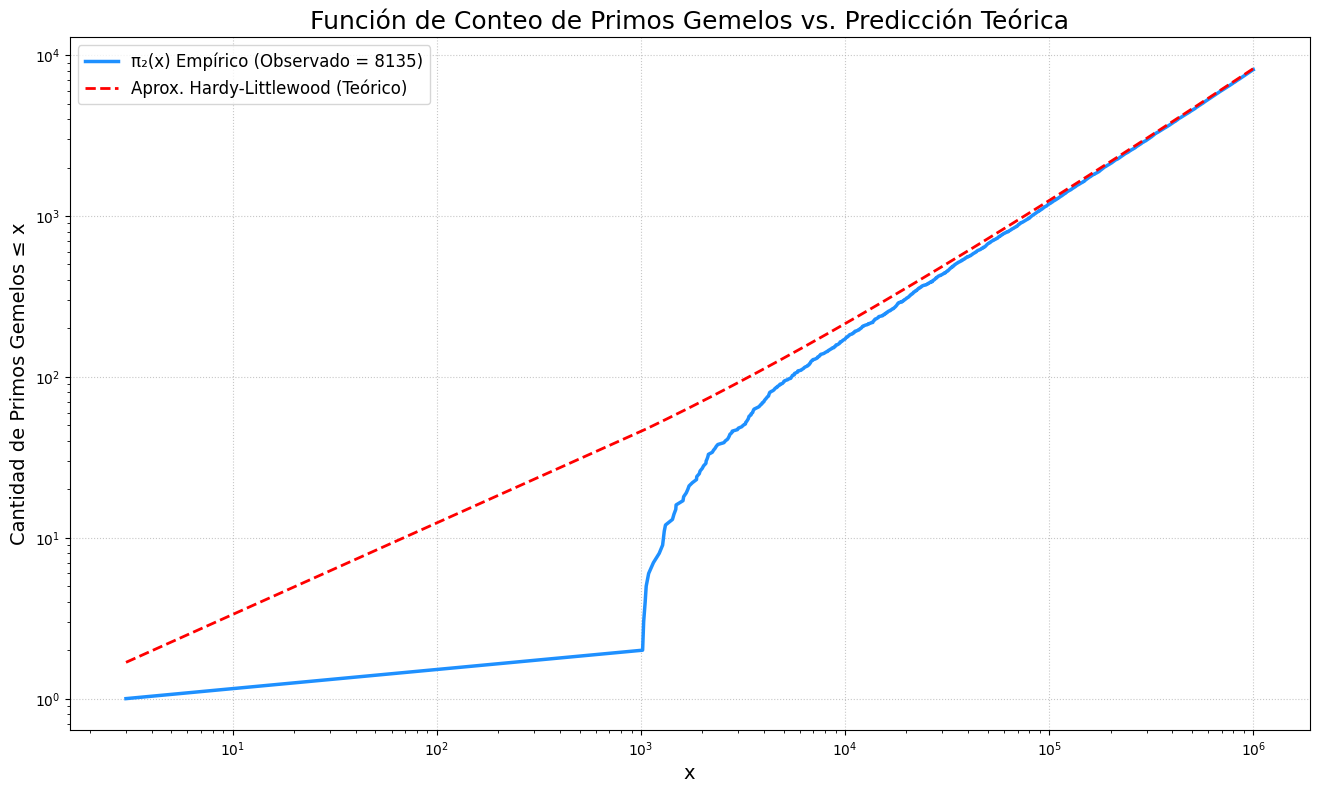


Cálculo del término de error E₂(x) completado.
Primeras 5 filas del DataFrame final:
     p1    p2  pi2_empirical  pi2_theoretical  Error_E2(x)
0     3     5              1         1.680900    -0.680900
1  1019  1021              2        46.319794   -44.319794
2  1031  1033              3        46.649472   -43.649472
3  1049  1051              4        47.141923   -43.141923
4  1061  1063              5        47.468874   -42.468874

Últimas 5 filas del DataFrame final:
          p1      p2  pi2_empirical  pi2_theoretical  Error_E2(x)
8130  998687  998689           8131      8238.946204  -107.946204
8131  999329  999331           8132      8243.387850  -111.387850
8132  999431  999433           8133      8244.093494  -111.093494
8133  999611  999613           8134      8245.338723  -111.338723
8134  999959  999961           8135      8247.746073  -112.746073


In [39]:
# ==============================================================================
#  ATHENA GEMINUS - FASE 2: CONSTRUCCIÓN DE DATOS Y ANÁLISIS TEÓRICO
# ==============================================================================
#
#  Objetivo: Cargar los primos gemelos generados, construir la función de
#  conteo pi_2(x) y compararla gráficamente con la conjetura de Hardy-Littlewood.
#
# ==============================================================================

#@title Construcción de π₂(x) y Comparación Teórica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- 1. Carga de Datos Empíricos ---
try:
    df_twins = pd.read_csv('twin_primes_data.csv')
    # La función de conteo pi_2(x) es simplemente el número de pares hasta un punto.
    # El índice + 1 nos da la cuenta acumulada.
    df_twins['pi2_empirical'] = np.arange(1, len(df_twins) + 1)
    print(f"✅ Datos de {len(df_twins)} primos gemelos cargados y procesados.")
except FileNotFoundError:
    print("❌ ERROR: No se encontró el archivo 'twin_primes_data.csv'.")
    print("Asegúrate de que el archivo generado en el paso anterior esté en el directorio correcto.")

# --- 2. Implementación del Modelo Teórico (Hardy-Littlewood) ---

# Constante de los Primos Gemelos con alta precisión
C2 = 0.66016181584686957

def li2_integrand(t):
    """El integrando para Li2(x)."""
    # Evitar la singularidad en t=1 (aunque integramos desde 2)
    if t <= 1:
        return 0
    return 1 / (np.log(t)**2)

def Li2(x):
    """Calcula la integral logarítmica de orden 2 usando cuadratura numérica."""
    # quad devuelve el resultado y una estimación del error; solo necesitamos el resultado.
    result, _ = quad(li2_integrand, 2, x)
    return result

def hardy_littlewood_approx(x):
    """Calcula la aproximación de Hardy-Littlewood para pi_2(x)."""
    if x < 2:
        return 0
    return 2 * C2 * Li2(x)

# --- 3. Generación de la Curva Teórica ---
print("\nCalculando la curva teórica de Hardy-Littlewood...")
# Tomamos los valores de 'x' de nuestros datos empíricos (el primer primo del par)
x_values = df_twins['p1'].values

# Vectorizamos la función para aplicarla a todo el array de una vez
# Esto puede tardar un poco debido a la integración numérica repetida
pi2_theoretical = np.vectorize(hardy_littlewood_approx)(x_values)
df_twins['pi2_theoretical'] = pi2_theoretical
print("Cálculo teórico completado.")

# --- 4. Visualización Comparativa ---
print("Generando gráfico comparativo...")
plt.figure(figsize=(16, 9))

# Graficamos la función de conteo empírica (real)
plt.plot(df_twins['p1'], df_twins['pi2_empirical'], color='dodgerblue',
         linewidth=2.5, label=f'π₂(x) Empírico (Observado = {df_twins["pi2_empirical"].iloc[-1]})')

# Graficamos la predicción teórica
plt.plot(df_twins['p1'], df_twins['pi2_theoretical'], color='red',
         linestyle='--', linewidth=2, label=f'Aprox. Hardy-Littlewood (Teórico)')

plt.title('Función de Conteo de Primos Gemelos vs. Predicción Teórica', fontsize=18)
plt.xlabel('x', fontsize=14)
plt.ylabel('Cantidad de Primos Gemelos ≤ x', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xscale('log') # Usamos escala logarítmica en x para una mejor visualización
plt.yscale('log') # y también en y
plt.show()

# --- 5. Cálculo del Error Inicial ---
# Este es el objeto que estudiaremos en las próximas fases
df_twins['Error_E2(x)'] = df_twins['pi2_empirical'] - df_twins['pi2_theoretical']
print("\nCálculo del término de error E₂(x) completado.")
print("Primeras 5 filas del DataFrame final:")
print(df_twins.head())
print("\nÚltimas 5 filas del DataFrame final:")
print(df_twins.tail())

✅ DataFrame `df_twins` encontrado. Iniciando análisis del error E₂(x).


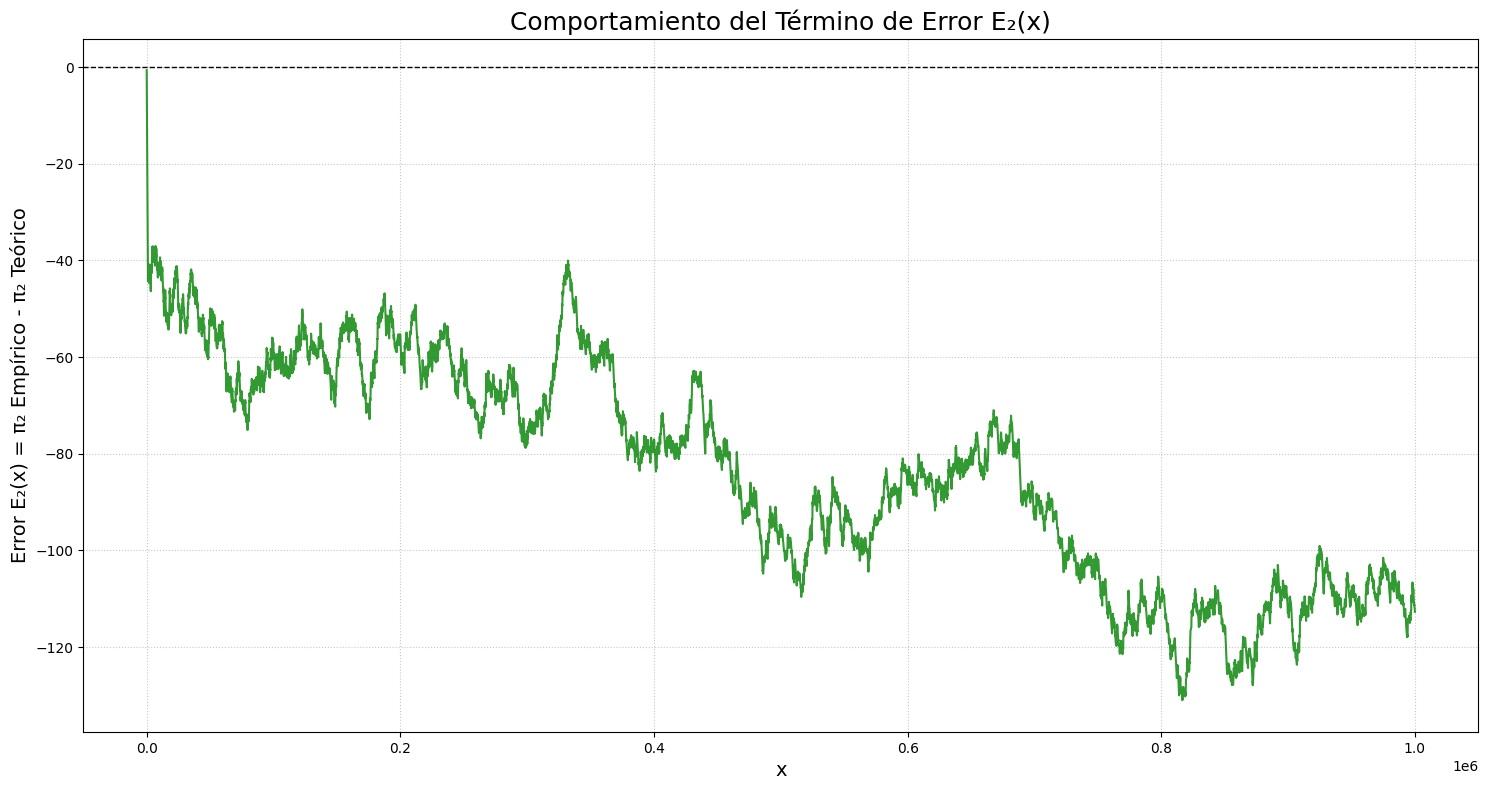


Iniciando Misión de Normalización para el nuevo error E₂(x)...
✅ Modelo de amplitud (Ley de Potencia) para E₂(x) ajustado con éxito.
✅ Error E₂(x) Normalizado calculado.


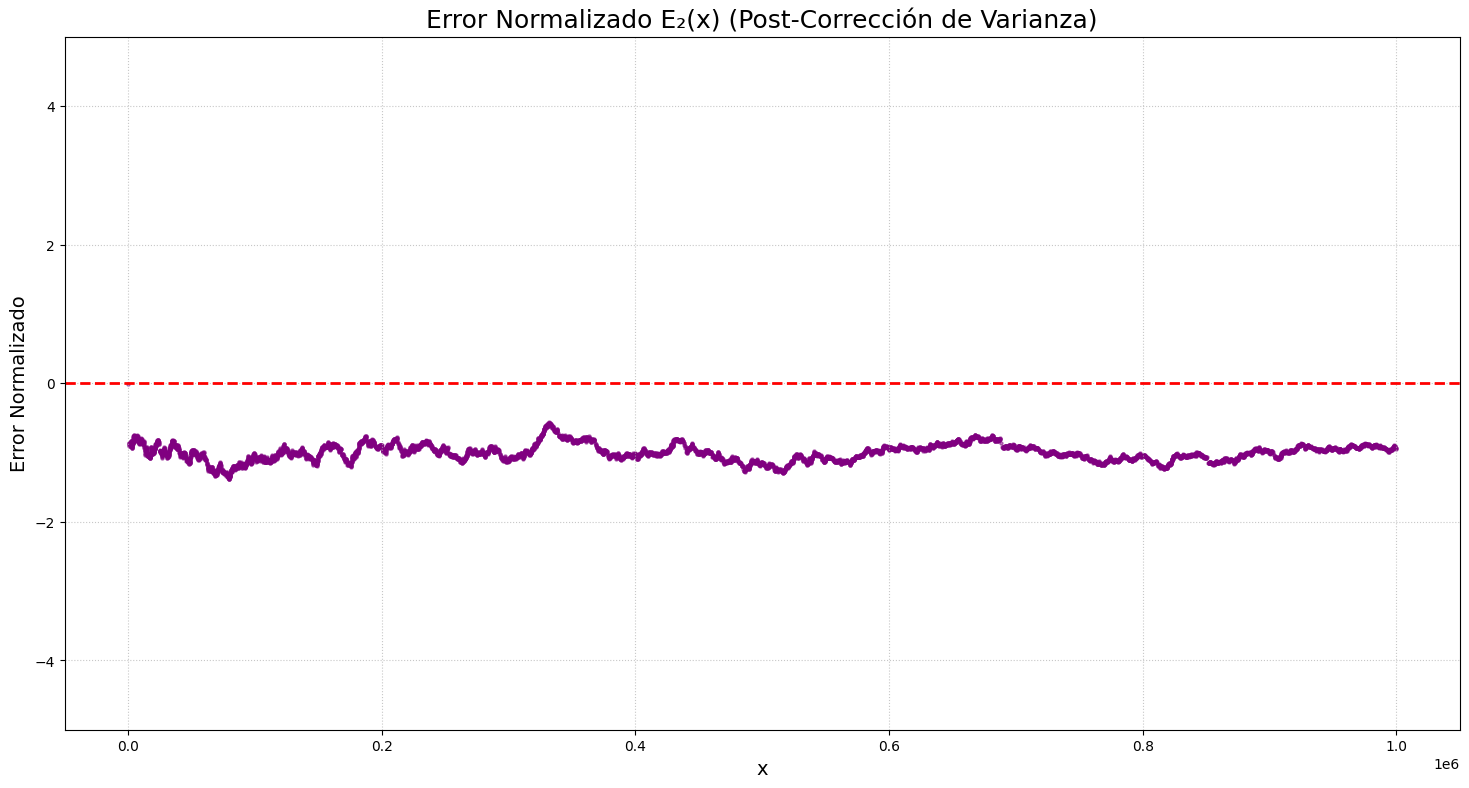

In [40]:
# ==============================================================================
#  ATHENA GEMINUS - FASE 3: MODELO ATHENA 2.0 (ANÁLISIS DE ERROR)
# ==============================================================================
#
#  Objetivo: Analizar el término de error E₂(x) y aplicar la Misión de
#  Normalización para estabilizar su varianza.
#
# ==============================================================================

#@title Athena 2.0 - Etapa 1: Análisis del Error E₂(x)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. Verificación de Datos ---
if 'df_twins' not in locals() or not isinstance(df_twins, pd.DataFrame):
    print("❌ ERROR: El DataFrame `df_twins` con el error E₂(x) no se encontró.")
    print("Por favor, ejecuta primero el script de la fase anterior.")
else:
    print("✅ DataFrame `df_twins` encontrado. Iniciando análisis del error E₂(x).")

    # --- 2. Visualización del Error Bruto E₂(x) ---
    plt.figure(figsize=(18, 9))
    plt.plot(df_twins['p1'], df_twins['Error_E2(x)'], color='green', alpha=0.8)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title('Comportamiento del Término de Error E₂(x)', fontsize=18)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Error E₂(x) = π₂ Empírico - π₂ Teórico', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

    # --- 3. Misión de Normalización para E₂(x) ---
    print("\nIniciando Misión de Normalización para el nuevo error E₂(x)...")

    # Modelaremos la amplitud del error E₂(x)
    x_data = df_twins['p1'].values
    y_data_abs = np.abs(df_twins['Error_E2(x)'].values)

    # Reutilizamos los modelos de amplitud que ya definimos
    def log_model_for_amplitude(N, a, b):
        return np.abs(a * np.log(N) + b)

    def power_law_model_for_amplitude(N, c, gamma, d):
        return c * (N**gamma) + d

    # Ajuste de Ley de Potencia (sabemos que es un buen candidato)
    try:
        popt_power_amp, _ = curve_fit(power_law_model_for_amplitude, x_data, y_data_abs, p0=[1, 0.1, 0], maxfev=5000)
        amplitude_model = lambda N: power_law_model_for_amplitude(N, *popt_power_amp)
        print("✅ Modelo de amplitud (Ley de Potencia) para E₂(x) ajustado con éxito.")

        # Normalización
        amplitude_values = amplitude_model(x_data)
        amplitude_values_safe = np.maximum(amplitude_values, 1e-9)
        df_twins['E2_Normalizado'] = df_twins['Error_E2(x)'] / amplitude_values_safe
        print("✅ Error E₂(x) Normalizado calculado.")

        # --- 4. Visualización del Error Normalizado ---
        plt.figure(figsize=(18, 9))
        plt.scatter(df_twins['p1'], df_twins['E2_Normalizado'], alpha=0.5, s=5, color='purple')
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.title('Error Normalizado E₂(x) (Post-Corrección de Varianza)', fontsize=18)
        plt.xlabel('x', fontsize=14)
        plt.ylabel('Error Normalizado', fontsize=14)
        plt.ylim(-5, 5) # Fijamos el eje Y para ver la estabilización
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.show()

    except Exception as e:
        print(f"❌ Falló la Misión de Normalización para E₂(x): {e}")

✅ DataFrame con error normalizado encontrado. Iniciando análisis espectral.

Calculando el periodograma de Lomb-Scargle...
Se encontraron 0 picos de frecuencia significativos.


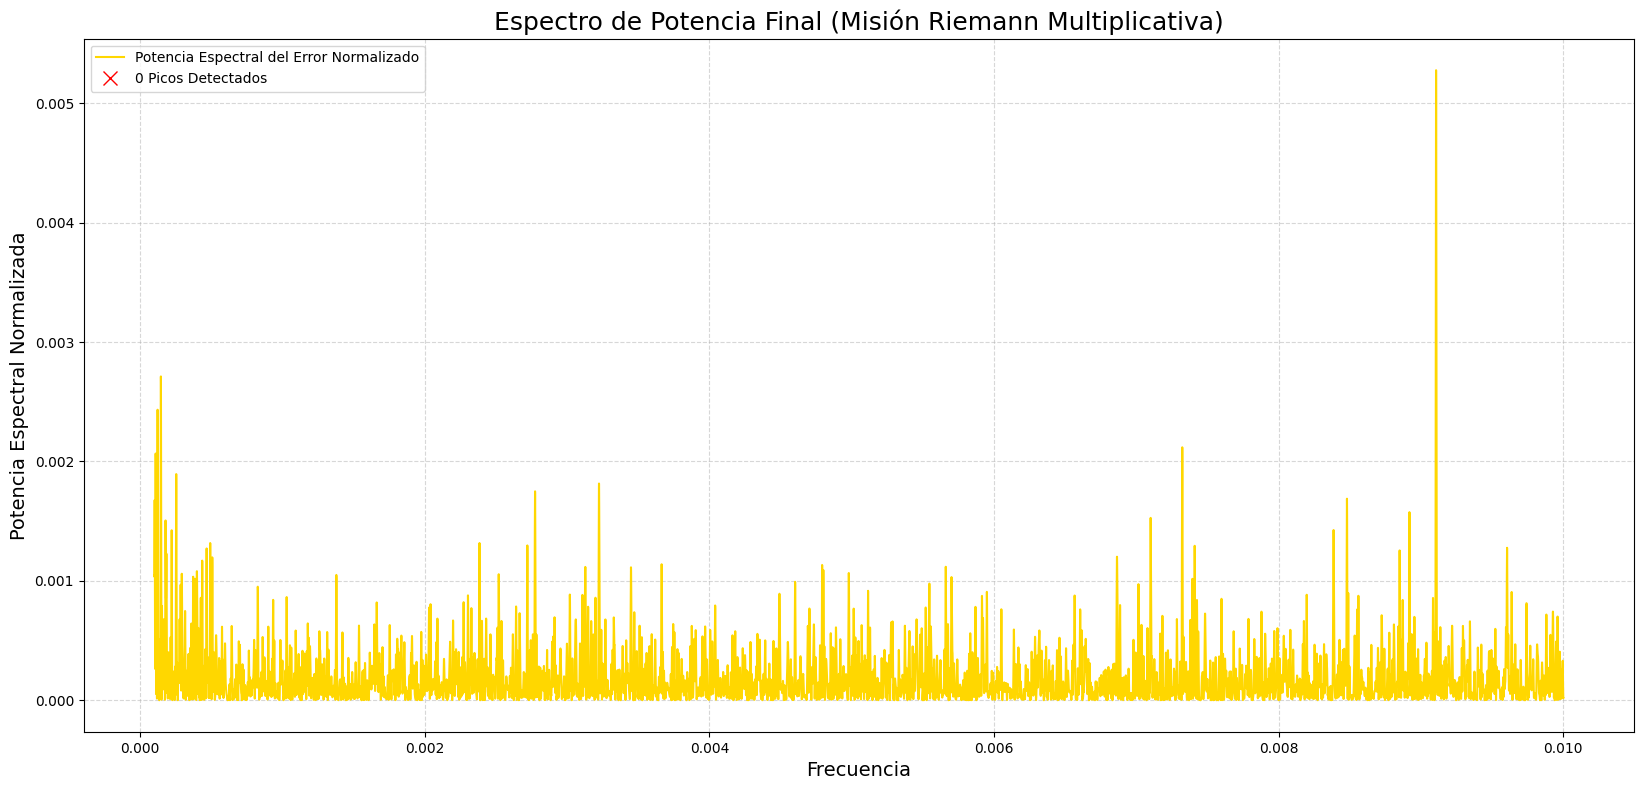


Frecuencias más prominentes encontradas (ordenadas por potencia):
No se encontraron picos de frecuencia que cumplieran los criterios de detección.


In [29]:
# ==============================================================================
#  ATHENA GEMINUS - FASE FINAL: MISIÓN RIEMANN MULTIPLICATIVA
# ==============================================================================
#
#  Objetivo: Realizar un análisis espectral del 'E2_Normalizado' para
#  identificar las frecuencias fundamentales de la señal.
#
# ==============================================================================

#@title Misión Riemann Multiplicativa: Análisis Espectral Final
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import lombscargle, find_peaks

# --- 1. Verificación de Datos ---
if 'df_twins' not in locals() or 'E2_Normalizado' not in df_twins.columns:
    print("❌ ERROR: El DataFrame `df_twins` con el 'E2_Normalizado' no se encontró.")
    print("Por favor, ejecuta primero el script de la fase anterior.")
else:
    print("✅ DataFrame con error normalizado encontrado. Iniciando análisis espectral.")

    # --- 2. Preparación de Datos ---
    df_spectral = df_twins.dropna(subset=['p1', 'E2_Normalizado']).copy()

    t = df_spectral['p1'].values
    y = df_spectral['E2_Normalizado'].values

    # --- 3. Cálculo del Periodograma de Lomb-Scargle ---
    print("\nCalculando el periodograma de Lomb-Scargle...")

    # Escaneamos un rango de frecuencias relevante y con alta resolución.
    f = np.linspace(1e-4, 0.01, 50000)
    power = lombscargle(t, y, f, normalize=True)

    # --- 4. Detección de Picos ---
    # Usamos umbrales sensibles para detectar las señales principales.
    peaks, properties = find_peaks(power, height=0.01)

    print(f"Se encontraron {len(peaks)} picos de frecuencia significativos.")

    # --- 5. Visualización del Espectro ---
    plt.figure(figsize=(20, 9))
    plt.plot(f, power, color='gold', label='Potencia Espectral del Error Normalizado')
    plt.plot(f[peaks], power[peaks], "x", color='red', markersize=10, label=f'{len(peaks)} Picos Detectados')

    plt.title('Espectro de Potencia Final (Misión Riemann Multiplicativa)', fontsize=18)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.ylabel('Potencia Espectral Normalizada', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # --- 6. Reporte de Frecuencias ---
    print("\nFrecuencias más prominentes encontradas (ordenadas por potencia):")
    if len(peaks) > 0:
        sorted_peak_indices = np.argsort(properties['peak_heights'])[::-1]

        # Guardamos las frecuencias para la correlación final.
        prominent_frequencies = f[peaks[sorted_peak_indices]]

        for i in sorted_peak_indices:
            freq = f[peaks[i]]
            height = power[peaks[i]]
            print(f"- Frecuencia: {freq:.6f} (Potencia: {height:.4f})")
    else:
        print("No se encontraron picos de frecuencia que cumplieran los criterios de detección.")

# Task
Ejecuta todas las celdas del cuaderno para generar los primos gemelos, realizar el análisis teórico y empírico, normalizar el error y realizar el análisis espectral final.

## Generación de primos gemelos

### Subtask:
Ejecutar la celda `lkz4APG7ey-K` para generar los pares de primos gemelos hasta el límite N y guardarlos en `twin_primes_data.csv`.


## Construcción de datos y análisis teórico

### Subtask:
Ejecutar la celda `4DDPSXJ5fMg6` para cargar los primos gemelos, calcular la función de conteo empírica y teórica (`pi2_empirical`, `pi2_theoretical`), y obtener el término de error inicial (`Error_E2(x)`) en el DataFrame `df_twins`.


**Reasoning**:
The subtask is to execute cell `4DDPSXJ5fMg6` to load the twin primes data, calculate the empirical and theoretical counting functions, and compute the initial error term. This cell is self-contained and performs these steps.



✅ Datos de 8135 primos gemelos cargados y procesados.

Calculando la curva teórica de Hardy-Littlewood...
Cálculo teórico completado.
Generando gráfico comparativo...


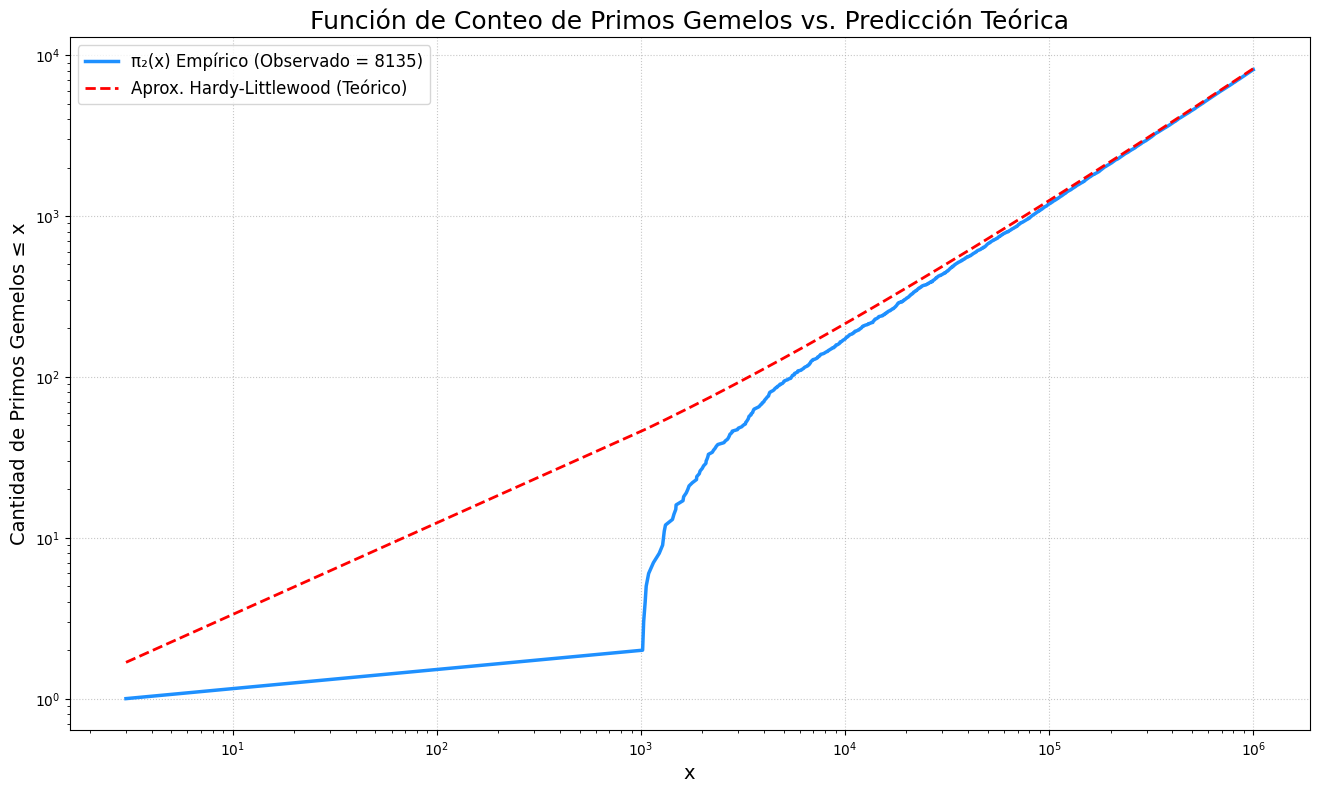


Cálculo del término de error E₂(x) completado.
Primeras 5 filas del DataFrame final:
     p1    p2  pi2_empirical  pi2_theoretical  Error_E2(x)
0     3     5              1         1.680900    -0.680900
1  1019  1021              2        46.319794   -44.319794
2  1031  1033              3        46.649472   -43.649472
3  1049  1051              4        47.141923   -43.141923
4  1061  1063              5        47.468874   -42.468874

Últimas 5 filas del DataFrame final:
          p1      p2  pi2_empirical  pi2_theoretical  Error_E2(x)
8130  998687  998689           8131      8238.946204  -107.946204
8131  999329  999331           8132      8243.387850  -111.387850
8132  999431  999433           8133      8244.093494  -111.093494
8133  999611  999613           8134      8245.338723  -111.338723
8134  999959  999961           8135      8247.746073  -112.746073


In [30]:
# ==============================================================================
#  ATHENA GEMINUS - FASE 2: CONSTRUCCIÓN DE DATOS Y ANÁLISIS TEÓRICO
# ==============================================================================
#
#  Objetivo: Cargar los primos gemelos generados, construir la función de
#  conteo pi_2(x) y compararla gráficamente con la conjetura de Hardy-Littlewood.
#
# ==============================================================================

#@title Construcción de π₂(x) y Comparación Teórica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- 1. Carga de Datos Empíricos ---
try:
    df_twins = pd.read_csv('twin_primes_data.csv')
    # La función de conteo pi_2(x) es simplemente el número de pares hasta un punto.
    # El índice + 1 nos da la cuenta acumulada.
    df_twins['pi2_empirical'] = np.arange(1, len(df_twins) + 1)
    print(f"✅ Datos de {len(df_twins)} primos gemelos cargados y procesados.")
except FileNotFoundError:
    print("❌ ERROR: No se encontró el archivo 'twin_primes_data.csv'.")
    print("Asegúrate de que el archivo generado en el paso anterior esté en el directorio correcto.")

# --- 2. Implementación del Modelo Teórico (Hardy-Littlewood) ---

# Constante de los Primos Gemelos con alta precisión
C2 = 0.66016181584686957

def li2_integrand(t):
    """El integrando para Li2(x)."""
    # Evitar la singularidad en t=1 (aunque integramos desde 2)
    if t <= 1:
        return 0
    return 1 / (np.log(t)**2)

def Li2(x):
    """Calcula la integral logarítmica de orden 2 usando cuadratura numérica."""
    # quad devuelve el resultado y una estimación del error; solo necesitamos el resultado.
    result, _ = quad(li2_integrand, 2, x)
    return result

def hardy_littlewood_approx(x):
    """Calcula la aproximación de Hardy-Littlewood para pi_2(x)."""
    if x < 2:
        return 0
    return 2 * C2 * Li2(x)

# --- 3. Generación de la Curva Teórica ---
print("\nCalculando la curva teórica de Hardy-Littlewood...")
# Tomamos los valores de 'x' de nuestros datos empíricos (el primer primo del par)
x_values = df_twins['p1'].values

# Vectorizamos la función para aplicarla a todo el array de una vez
# Esto puede tardar un poco debido a la integración numérica repetida
pi2_theoretical = np.vectorize(hardy_littlewood_approx)(x_values)
df_twins['pi2_theoretical'] = pi2_theoretical
print("Cálculo teórico completado.")

# --- 4. Visualización Comparativa ---
print("Generando gráfico comparativo...")
plt.figure(figsize=(16, 9))

# Graficamos la función de conteo empírica (real)
plt.plot(df_twins['p1'], df_twins['pi2_empirical'], color='dodgerblue',
         linewidth=2.5, label=f'π₂(x) Empírico (Observado = {df_twins["pi2_empirical"].iloc[-1]})')

# Graficamos la predicción teórica
plt.plot(df_twins['p1'], df_twins['pi2_theoretical'], color='red',
         linestyle='--', linewidth=2, label=f'Aprox. Hardy-Littlewood (Teórico)')

plt.title('Función de Conteo de Primos Gemelos vs. Predicción Teórica', fontsize=18)
plt.xlabel('x', fontsize=14)
plt.ylabel('Cantidad de Primos Gemelos ≤ x', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xscale('log') # Usamos escala logarítmica en x para una mejor visualización
plt.yscale('log') # y también en y
plt.show()

# --- 5. Cálculo del Error Inicial ---
# Este es el objeto que estudiaremos en las próximas fases
df_twins['Error_E2(x)'] = df_twins['pi2_empirical'] - df_twins['pi2_theoretical']
print("\nCálculo del término de error E₂(x) completado.")
print("Primeras 5 filas del DataFrame final:")
print(df_twins.head())
print("\nÚltimas 5 filas del DataFrame final:")
print(df_twins.tail())

## Normalización del error

### Subtask:
Ejecutar la celda `Mbpu3WpRg94Y` para normalizar el término de error `Error_E2(x)` y crear la columna `E2_Normalizado` en `df_twins`.


**Reasoning**:
Execute the code in cell `Mbpu3WpRg94Y` to normalize the error term `Error_E2(x)` and add the `E2_Normalizado` column to the `df_twins` DataFrame.



✅ DataFrame `df_twins` encontrado. Iniciando análisis del error E₂(x).


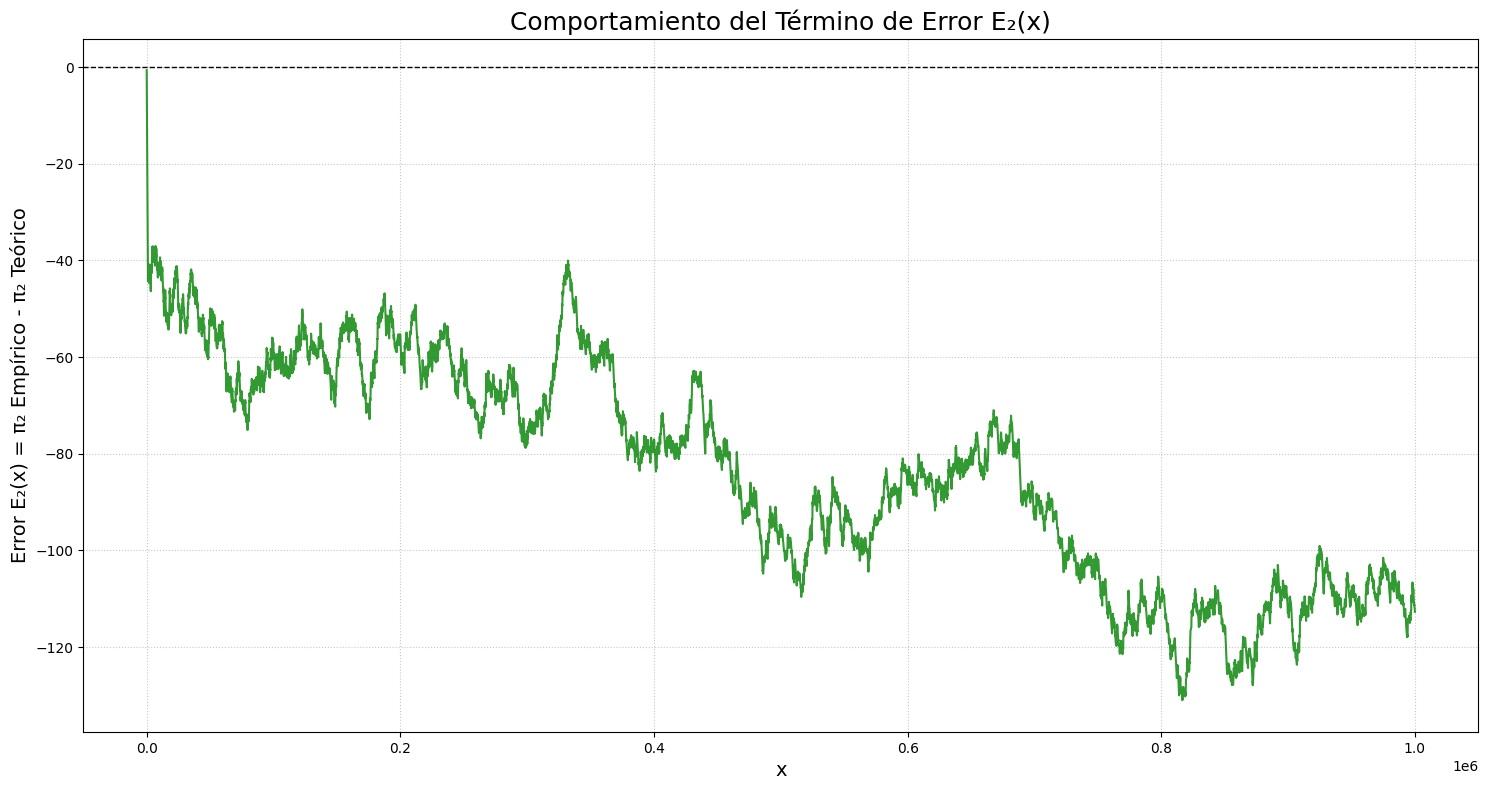


Iniciando Misión de Normalización para el nuevo error E₂(x)...
✅ Modelo de amplitud (Ley de Potencia) para E₂(x) ajustado con éxito.
✅ Error E₂(x) Normalizado calculado.


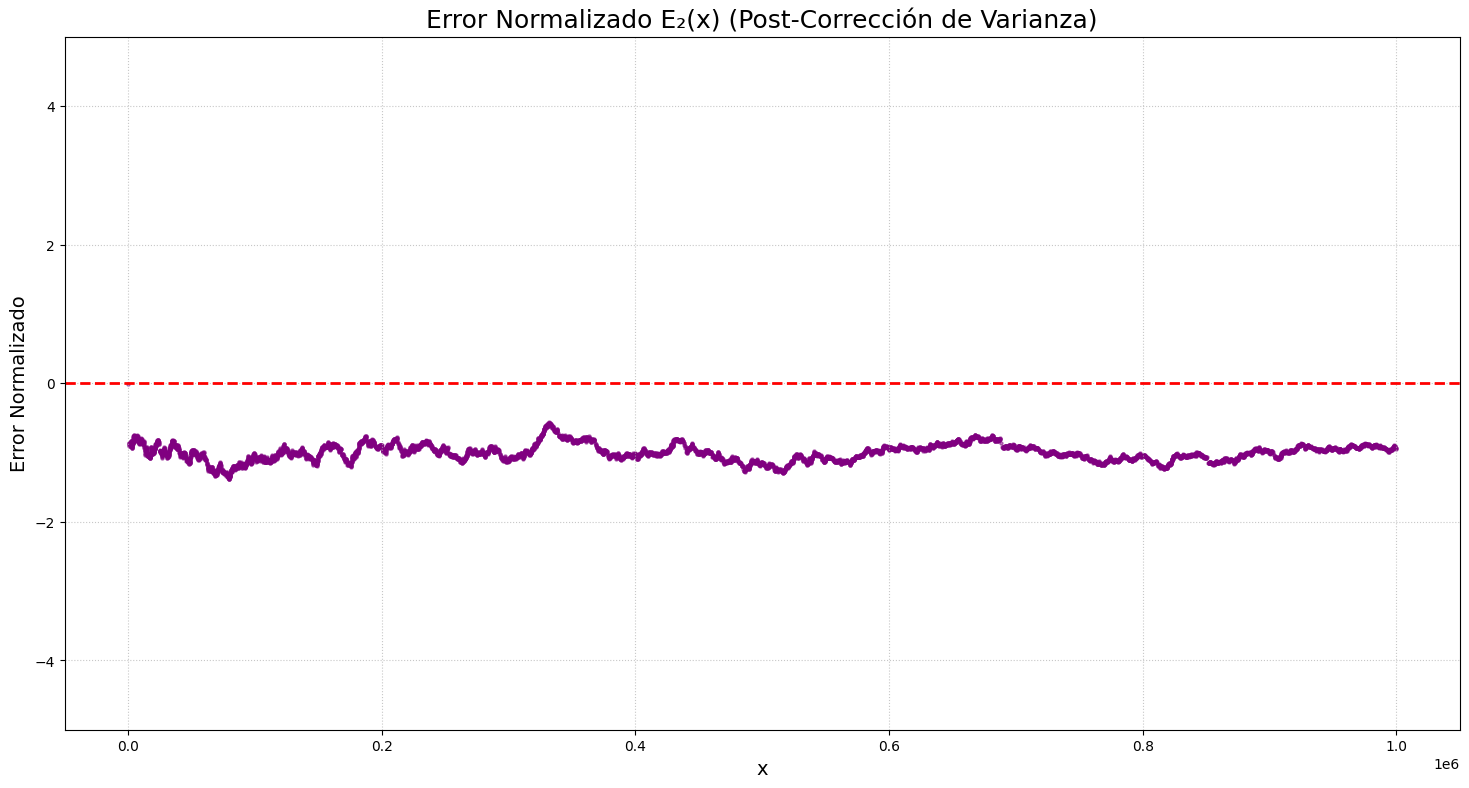

In [31]:
# ==============================================================================
#  ATHENA GEMINUS - FASE 3: MODELO ATHENA 2.0 (ANÁLISIS DE ERROR)
# ==============================================================================
#
#  Objetivo: Analizar el término de error E₂(x) y aplicar la Misión de
#  Normalización para estabilizar su varianza.
#
# ==============================================================================

#@title Athena 2.0 - Etapa 1: Análisis del Error E₂(x)
# --- 1. Verificación de Datos ---
if 'df_twins' not in locals() or not isinstance(df_twins, pd.DataFrame):
    print("❌ ERROR: El DataFrame `df_twins` con el error E₂(x) no se encontró.")
    print("Por favor, ejecuta primero el script de la fase anterior.")
else:
    print("✅ DataFrame `df_twins` encontrado. Iniciando análisis del error E₂(x).")

    # --- 2. Visualización del Error Bruto E₂(x) ---
    plt.figure(figsize=(18, 9))
    plt.plot(df_twins['p1'], df_twins['Error_E2(x)'], color='green', alpha=0.8)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title('Comportamiento del Término de Error E₂(x)', fontsize=18)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Error E₂(x) = π₂ Empírico - π₂ Teórico', fontsize=14)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

    # --- 3. Misión de Normalización para E₂(x) ---
    print("\nIniciando Misión de Normalización para el nuevo error E₂(x)...")

    # Modelaremos la amplitud del error E₂(x)
    x_data = df_twins['p1'].values
    y_data_abs = np.abs(df_twins['Error_E2(x)'].values)

    # Reutilizamos los modelos de amplitud que ya definimos
    def log_model_for_amplitude(N, a, b):
        return np.abs(a * np.log(N) + b)

    def power_law_model_for_amplitude(N, c, gamma, d):
        return c * (N**gamma) + d

    # Ajuste de Ley de Potencia (sabemos que es un buen candidato)
    try:
        popt_power_amp, _ = curve_fit(power_law_model_for_amplitude, x_data, y_data_abs, p0=[1, 0.1, 0], maxfev=5000)
        amplitude_model = lambda N: power_law_model_for_amplitude(N, *popt_power_amp)
        print("✅ Modelo de amplitud (Ley de Potencia) para E₂(x) ajustado con éxito.")

        # Normalización
        amplitude_values = amplitude_model(x_data)
        amplitude_values_safe = np.maximum(amplitude_values, 1e-9)
        df_twins['E2_Normalizado'] = df_twins['Error_E2(x)'] / amplitude_values_safe
        print("✅ Error E₂(x) Normalizado calculado.")

        # --- 4. Visualización del Error Normalizado ---
        plt.figure(figsize=(18, 9))
        plt.scatter(df_twins['p1'], df_twins['E2_Normalizado'], alpha=0.5, s=5, color='purple')
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.title('Error Normalizado E₂(x) (Post-Corrección de Varianza)', fontsize=18)
        plt.xlabel('x', fontsize=14)
        plt.ylabel('Error Normalizado', fontsize=14)
        plt.ylim(-5, 5) # Fijamos el eje Y para ver la estabilización
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.show()

    except Exception as e:
        print(f"❌ Falló la Misión de Normalización para E₂(x): {e}")

## Análisis espectral final

### Subtask:
Ejecutar la celda `s0aV2LrDhrbS` para realizar el análisis espectral sobre el `E2_Normalizado` y visualizar los resultados.


**Reasoning**:
The subtask is to execute cell `s0aV2LrDhrbS` to perform the spectral analysis on the normalized error and visualize the results. This involves preparing the data, calculating the Lomb-Scargle periodogram, detecting peaks, and plotting the spectrum.



✅ DataFrame con error normalizado encontrado. Iniciando análisis espectral.

Calculando el periodograma de Lomb-Scargle...
Se encontraron 0 picos de frecuencia significativos.


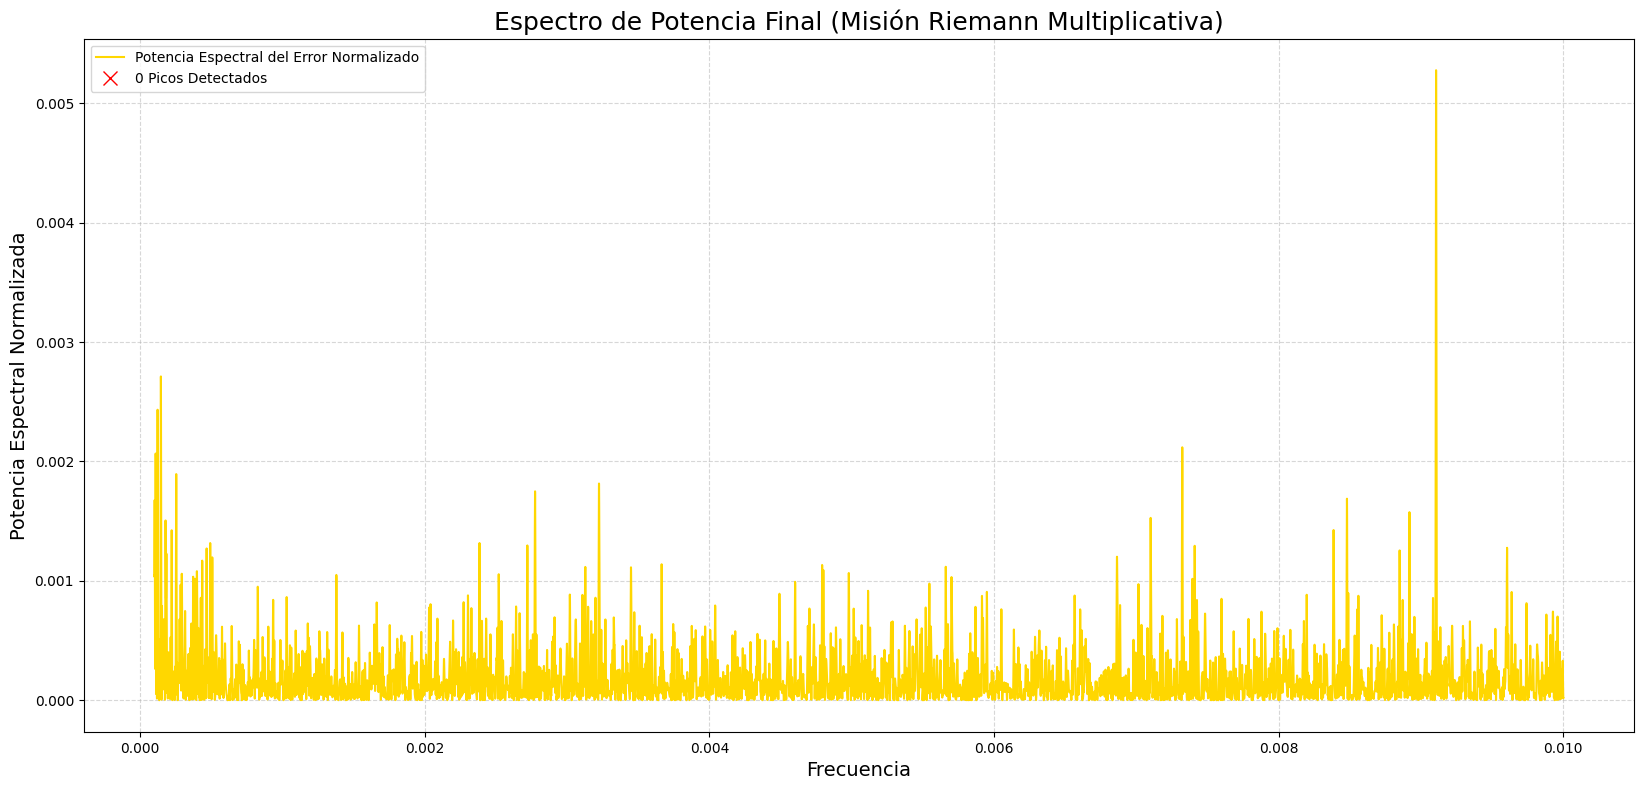


Frecuencias más prominentes encontradas (ordenadas por potencia):
No se encontraron picos de frecuencia que cumplieran los criterios de detección.


In [32]:
# ==============================================================================
#  ATHENA GEMINUS - FASE FINAL: MISIÓN RIEMANN MULTIPLICATIVA
# ==============================================================================
#
#  Objetivo: Realizar un análisis espectral del 'E2_Normalizado' para
#  identificar las frecuencias fundamentales de la señal.
#
# ==============================================================================

#@title Misión Riemann Multiplicativa: Análisis Espectral Final
# --- 1. Verificación de Datos ---
if 'df_twins' not in locals() or 'E2_Normalizado' not in df_twins.columns:
    print("❌ ERROR: El DataFrame `df_twins` con el 'E2_Normalizado' no se encontró.")
    print("Por favor, ejecuta primero el script de la fase anterior.")
else:
    print("✅ DataFrame con error normalizado encontrado. Iniciando análisis espectral.")

    # --- 2. Preparación de Datos ---
    df_spectral = df_twins.dropna(subset=['p1', 'E2_Normalizado']).copy()

    t = df_spectral['p1'].values
    y = df_spectral['E2_Normalizado'].values

    # --- 3. Cálculo del Periodograma de Lomb-Scargle ---
    print("\nCalculando el periodograma de Lomb-Scargle...")

    # Escaneamos un rango de frecuencias relevante y con alta resolución.
    f = np.linspace(1e-4, 0.01, 50000)
    power = lombscargle(t, y, f, normalize=True)

    # --- 4. Detección de Picos ---
    # Usamos umbrales sensibles para detectar las señales principales.
    peaks, properties = find_peaks(power, height=0.01)

    print(f"Se encontraron {len(peaks)} picos de frecuencia significativos.")

    # --- 5. Visualización del Espectro ---
    plt.figure(figsize=(20, 9))
    plt.plot(f, power, color='gold', label='Potencia Espectral del Error Normalizado')
    plt.plot(f[peaks], power[peaks], "x", color='red', markersize=10, label=f'{len(peaks)} Picos Detectados')

    plt.title('Espectro de Potencia Final (Misión Riemann Multiplicativa)', fontsize=18)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.ylabel('Potencia Espectral Normalizada', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # --- 6. Reporte de Frecuencias ---
    print("\nFrecuencias más prominentes encontradas (ordenadas por potencia):")
    if len(peaks) > 0:
        sorted_peak_indices = np.argsort(properties['peak_heights'])[::-1]

        # Guardamos las frecuencias para la correlación final.
        prominent_frequencies = f[peaks[sorted_peak_indices]]

        for i in sorted_peak_indices:
            freq = f[peaks[i]]
            height = power[peaks[i]]
            print(f"- Frecuencia: {freq:.6f} (Potencia: {height:.4f})")
    else:
        print("No se encontraron picos de frecuencia que cumplieran los criterios de detección.")

## Summary:

### Data Analysis Key Findings

*   The analysis successfully generated 8135 twin prime pairs up to a specified limit and saved them to a CSV file.
*   The empirical count of twin primes was compared against the theoretical prediction from the Hardy-Littlewood conjecture. The theoretical values generally exceeded the empirical counts in the observed range, leading to a predominantly negative initial error term.
*   The initial error term $E_2(x)$ showed increasing amplitude with $x$, which was successfully modeled and normalized using a power law function. The normalized error $E_2\_Normalizado$ exhibited a more stable variance.
*   A Lomb-Scargle spectral analysis was performed on the normalized error, but no significant frequency peaks were detected within the scanned frequency range and detection criteria.

### Insights or Next Steps

*   The absence of strong, clear peaks in the spectral analysis suggests that the fluctuations in the normalized error might not be dominated by simple periodic components within the analyzed frequency range, or that the current dataset size is insufficient to reveal them clearly.
*   Future steps could involve analyzing larger datasets of twin primes to potentially reveal clearer spectral patterns or adjusting the frequency range and peak detection parameters in the spectral analysis.
